In [ ]:
!pip install -U classiq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.6/151.6 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.8/401.8 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing insta

In [ ]:
import classiq
classiq.authenticate()

Your user code: RKVZ-DZHS
If a browser doesn't automatically open, please visit this URL from any trusted device: https://auth.classiq.io/activate?user_code=RKVZ-DZHS


In [ ]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 77.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 11.4 MB/s eta 0:00:00


Our project topic is "**Exponential quantum speedup in simulating coupled classical oscillators**".

We have already implemented the first task, the "toy problem" which can be accessed here: (https://github.com/ShamaritaDeb/Development-of-Novel-Quantum-Algorithms/blob/41cf1e63aaacec470dbe07132c8ab0e1decd3cc2/toyproblem.ipynb).

We now move onto the second step to enlarge the problem in more complicated scenario.


# **Algorithm**
1. Get the masses of the balls and form the matrix $M$.
2. Get the spring constants and form the matrix $K$.
3. Calculate the matrix $A = (\sqrt{M})^{-1}K(\sqrt{M})^{-1}$.
4. Find $B$ such that $A = BB^{\dagger}$ using the Cholesky Decomposition.
5. Construct the Hamiltonian of the system $$H = \begin{pmatrix} 0 & B\\ B^{\dagger} & 0 \end{pmatrix}.$$
6. Decompose $H$ in Paulis using qiskit.
7. Simulate the time evolution of the Hamiltonian $H$ on the Classiq platform.
8. Use VQE to find the optimal energy.




### **Algorithm Inspiration**

For additional insights and examples, one may refer to the following reference:

**Exponential quantum speedup in simulating coupled classical oscillators** (https://doi.org/10.1103/PhysRevX.13.041041).


In [ ]:
import json
import pathlib
import random
from typing import cast

import matplotlib.pyplot as plt
import numpy as np
import tqdm

from classiq import *
from classiq.execution import ExecutionPreferences

from qiskit.quantum_info import SparsePauliOp
import networkx as nx

For more complicated scenario, we perfom operations that offers following advantages and degrees of freedom for enlarged system based on user requirements:

- **Flexibility**: Users can specify the number of masses $ N $ and their
    respective values through the `masses` list.
- **Coupling Terms**: Optional off-diagonal coupling terms can be added via the `coupling` parameter.
- **Modification**: Adjust `N` to change the number of masses and modify `masses` to set specific mass values. Include a `coupling` matrix if interactions between masses are non-zero.

**Note**: In our case, we have choosen $N=2$ for further calculation.

1. **Mass Matrix $ M $**:
   - The function `form_M` constructs the mass matrix $M$ using specified diagonal mass values and optional off-diagonal coupling terms.
   - For $N = 2$ and masses $[1, 1]$, the mass matrix $M$ is generated and printed.


2. **Spring Constant Matrix $ K$**:
   - The function `form_K` constructs the spring constant matrix $ K$ with default or custom internal and boundary spring constants.
   - For $N = 2$ with default spring and boundary constants of $ 1$, the spring constant matrix $K$ is generated and printed.

3. **Hamiltonian Matrix $ H $**:
   - The function `compute_H` computes the Hamiltonian matrix $H$ from the mass matrix $M$ and the spring constant matrix $K$.
   - It constructs matrix $A$ and checks its properties for symmetry and positive semi-definiteness.
   - Using Cholesky decomposition, it finds the matrix $B$ and reconstructs $A$ to verify correctness.
   - The Hamiltonian matrix $H$ is then constructed and printed.

  **Condition verfication:**
  Finally, we also check if the matrix $A$ satisfies the conditions according to the algorithm.

In [ ]:
def form_M(N, masses, coupling=None):
    """
    Form a generalized mass matrix M.

    Parameters:
    - N: Number of masses (size of the matrix).
    - masses: List or array of mass values for the diagonal elements.
    - coupling: Optional matrix of coupling terms (off-diagonal elements).

    Returns:
    - M: The NxN mass matrix.
    """
    if coupling is None:
        coupling = np.zeros((N, N))
    M = np.zeros((N, N))
    np.fill_diagonal(M, masses)
    M += coupling
    return M

#example usage
n = 1
# Number of masses in the coupled oscillators
N = 2**n # classical coupled oscillator system of 2 masses/balls
masses = [1, 1]
M = form_M(N, masses) # Call the function to initialize M
print("mass Matrix M:\n", M)


def form_K(N, spring_constant, boundary_constant, custom_spring_constants=None, custom_boundary_constants=None):
    """
    Forms the spring constant matrix K for a system of N oscillators.

    Parameters:
    - N: Number of oscillators (masses).
    - spring_constant: Default value for all internal spring constants (k1, k2, ..., kN-1).
    - boundary_constant: Default value for the springs connected to the walls (k0 and kN).
    - custom_spring_constants: List of custom values for internal spring constants [k1, k2, ..., kN-1].
    - custom_boundary_constants: List of custom values for boundary spring constants [k0, kN].

    Returns:
    - K: The NxN spring constant matrix.
    """

    # Initialize spring constants
    if custom_spring_constants is None:
        spring_constants = [spring_constant] * (N - 1)
    else:
        spring_constants = custom_spring_constants

    # Initialize boundary constants
    if custom_boundary_constants is None:
        boundary_constants = [boundary_constant, boundary_constant]
    else:
        boundary_constants = custom_boundary_constants

    # Initialize the K matrix
    K = np.zeros((N, N))

    # Add spring constants for internal springs between masses
    for i in range(N - 1):
        K[i, i] += spring_constants[i]
        K[i, i + 1] -= spring_constants[i]
        K[i + 1, i] -= spring_constants[i]
        K[i + 1, i + 1] += spring_constants[i]

    # Handle boundary conditions (springs connected to walls)
    K[0, 0] += boundary_constants[0]  # First mass connected to the left wall (k0)
    K[-1, -1] += boundary_constants[1]  # Last mass connected to the right wall (kN)

    return K

# Example usage:


# Default values for simplicity (all spring constants set to 1)
spring_constant = 1
boundary_constant = 1

# Optional custom spring constants (uncomment and customize if needed)
# custom_spring_constants = [1, 1, 1]  # Internal springs: k1, k2, k3
# custom_boundary_constants = [1, 1]   # Boundary springs: k0, kN

# Use the function with or without custom values
K = form_K(N, spring_constant, boundary_constant)  # Use default values
#K = form_K(N, custom_spring_constants=custom_spring_constants, custom_boundary_constants=custom_boundary_constants)  # Use custom values

print("spring constants Matrix K:\n",K)

def compute_H(M, K):
  # Construct the matrix A from M and K
  A = np.dot(np.linalg.inv(np.sqrt(M)), np.dot(K, np.linalg.inv(np.sqrt(M))))
  print("Matrix A:\n", A)
  print("Is A symmetric?:", np.allclose(A, A.T))
   # Ensure A is positive semi-definite for Cholesky decomposition
  if not np.all(np.linalg.eigvals(A) >= 0):
        print("Matrix A is not positive semi-definite.")
        return None, None
  try:
    # Define B such that B B^† = A
    B = np.linalg.cholesky(A)  # Using Cholesky decomposition
    B_dagger = np.conjugate(B.T)
  except np.linalg.LinAlgError:
        print("Matrix A is not positive-definite.")
        return None, None
  print("Matrix B:\n", B)
  # Reconstruct A to check the result
  A_reconstructed = np.dot(B, B_dagger)
  print("Reconstructed A from B:\n", A_reconstructed)
  print("Is reconstructed A close to original A?:", np.allclose(A, A_reconstructed))
  # Construct the block Hamiltonian H
  H = np.block([[np.zeros((N, N)), B], [B_dagger, np.zeros((N, N))]])
  return H

H = compute_H(M, K)
print("Hamitonian Matrix H:\n",H)

eigenvalues = np.linalg.eigvals(H)
print("Eigenvalues of the Hamiltonian H:", eigenvalues)

mass Matrix M:
 [[1. 0.]
 [0. 1.]]
spring constants Matrix K:
 [[ 2. -1.]
 [-1.  2.]]
Matrix A:
 [[ 2. -1.]
 [-1.  2.]]
Is A symmetric?: True
Matrix B:
 [[ 1.41421356  0.        ]
 [-0.70710678  1.22474487]]
Reconstructed A from B:
 [[ 2. -1.]
 [-1.  2.]]
Is reconstructed A close to original A?: True
Hamitonian Matrix H:
 [[ 0.          0.          1.41421356  0.        ]
 [ 0.          0.         -0.70710678  1.22474487]
 [ 1.41421356 -0.70710678  0.          0.        ]
 [ 0.          1.22474487  0.          0.        ]]
Eigenvalues of the Hamiltonian H: [-1.73205081 -1.          1.73205081  1.        ]


In [ ]:
CHAR_TO_STUCT_DICT = {"I": Pauli.I, "X": Pauli.X, "Y": Pauli.Y, "Z": Pauli.Z}


def pauli_str_to_enums(pauli):
    return [CHAR_TO_STUCT_DICT[s] for s in pauli]


def pauli_list_to_hamiltonian(pauli_list):
    return [
        PauliTerm(
            pauli=pauli_str_to_enums(pauli), coefficient=cast(complex, coeff).real
        )
        for pauli, coeff in pauli_list
    ]



This above code block includes functions for handling Pauli matrices in quantum mechanics:

1. **CHAR_TO_STRUCT_DICT**:
   - A dictionary mapping Pauli matrix characters ("$I$", "$X$", "$Y$", "$Z$") to their corresponding Pauli matrix objects.

2. **Function `pauli_str_to_enums(pauli)`**:
   - Converts a list of Pauli matrix characters (e.g., ["$X$", "$Z$"]) into their corresponding Pauli matrix objects using `CHAR_TO_STRUCT_DICT`.

3. **Function `pauli_list_to_hamiltonian(pauli_list)`**:
   - Takes a list of tuples where each tuple contains a string of Pauli matrices and a coefficient.
   - Converts the Pauli matrix string to Pauli matrix objects and ensures the coefficient is a real number.
   - Returns a list of `PauliTerm` objects, each representing a term in a Hamiltonian with its Pauli matrices and coefficient.


### **Code Inspiration**

For additional insights and examples, one may refer to the following reference:

- [Classiq Documentation on Glued Trees Algorithm](https://docs.classiq.io/latest/explore/algorithms/glued_trees/glued_trees/?h=tr#quantum-algorithm)


In [ ]:
def crop_pauli_list(pauli, size):
    if len(pauli) <= size:
        return pauli
    result = []
    idx = 0
    while len(result) < round(size * 0.6):
        for i in range(len(pauli[0][0]) - 1, -1, -1):
            for k in pauli:
                if k[0][i] == "IXYZ"[idx % 4] and k not in result:
                    result.append(k)
                    break
            idx += 1
    for i in pauli:
        if len(result) >= size:
            break
        if i not in result:
            result.append(i)
    return result

def generate_pauli_list(H):
    c = SparsePauliOp.from_operator(H)
    result = [(str(c.paulis[i]), c.coeffs[i].real) for i in range(len(c))]
    return crop_pauli_list(sorted(result, key=lambda x: abs(x[1]), reverse=True), 200)




This code block includes functions for managing and generating Pauli matrices in Hamiltonians:

1. **Function `crop_pauli_list(pauli, size)`**:
   - **Purpose**: It trims a list of Pauli matrix terms to a specified size.
   - **Process**:
     - If the length of `pauli` is less than or equal to `size`, returns the original list.
     - Otherwise, iteratively selects terms to include based on their Pauli matrix characters, prioritizing terms with unique characters in a cyclic order ("$I$", "$X$", "$Y$", "$Z$").
     - Continues adding terms until approximately 60% of the desired size is reached.
     - Appends remaining terms until the final list size matches `size`, avoiding duplicates.

2. **Function `generate_pauli_list(H)`**:
   - **Purpose**: Converts a Hamiltonian $H$ into a cropped list of Pauli matrix terms.
   - **Process**:
     - Converts Hamiltonian $H$ into a `SparsePauliOp` object.
     - Extracts Pauli matrix terms and their coefficients from the `SparsePauliOp` object.
     - Sorts these terms by the absolute value of their coefficients in descending order.
     - Calls `crop_pauli_list` to trim the list to a maximum size of 200, focusing on the most significant terms.

This code efficiently handles and reduces the complexity of Hamiltonians by managing and selecting relevant Pauli matrix terms.

### **Code Inspiration**

For additional insights and examples, one may refer to the following reference:

- [Classiq Documentation on Glued Trees Algorithm](https://docs.classiq.io/latest/explore/algorithms/glued_trees/glued_trees/?h=tr#quantum-algorithm)

In [ ]:
pauli_list = generate_pauli_list(H)
# times = []
counts_dict = {}
resources_used = {}
mesh_size = 0.10
end_time = 20

for i in range(int(end_time/mesh_size)+1):
  t = i * mesh_size
  # times.append(t)
  @qfunc
  def main(state: Output[QArray[QBit]]) -> None:
    allocate(len(pauli_list[0][0]), state)
    exponentiation_with_depth_constraint(
            pauli_list_to_hamiltonian(pauli_list),
            evolution_coefficient=t,
            max_depth=1400,
            qbv=state)
  execution_preferences = ExecutionPreferences(num_shots=8192)
  model = set_execution_preferences(create_model(main), execution_preferences)
  quantum_program = synthesize(model)
  job = execute(quantum_program)
  counts_dict[t] = job.result()[0].value.counts
  resources_used[t] = {'circuit_width': QuantumProgram.from_qprog(quantum_program).data.width,
                       'circuit_depth': QuantumProgram.from_qprog(quantum_program).transpiled_circuit.depth,
                       'gate_counts': QuantumProgram.from_qprog(quantum_program).transpiled_circuit.count_ops}

show(quantum_program)

Opening: https://platform.classiq.io/circuit/34e4bd4e-36e0-4372-89d2-7d699be58ba6?version=0.44.0


This code block performs quantum simulations over time period and collects results:

1. **Initial Step**:
   - **Pauli List**: Generates a list of Pauli matrix terms for Hamiltonian $H$ using `generate_pauli_list`.

2. **Parameters**:
   - **mesh_size**: The time increment for each simulation step (`0.10` units).
   - **end_time**: Total duration of the simulation (`20` units).

   **NOTE**
   - A smaller `mesh_size` results in more time steps over a given `end_time`, increasing the number of iterations in the loop.
   - More time steps mean more quantum function executions and longer computation time, which can lead to higher resource usage.
   - With more time steps, the `counts_dict` will store more data, potentially using more memory.
   - Smaller mesh size provides more detailed insights into the quantum system's dynamics but requires more computational effort.

3. **Loop Over Time Steps**:
   - **Iterations**: Runs a loop from `0` to `end_time` in steps of `mesh_size`.
   - **Time `t`**: Calculates the current time step.

4. **Quantum Function Definition**:
   - **Function `main`**:
     - **Purpose**: Defines a quantum function that prepares and evolves a quantum state.
     - **State Allocation**: Allocates qubits based on the Pauli list length.
     - **Hamiltonian Evolution**: Applies the Hamiltonian evolution with the current time `t` and a depth constraint (`1400`) which is around the range of the current limit for comprehensible results in state of the art quantum computers.

5. **Execution and Results Collection**:
   - **Execution Preferences**: Sets preferences for quantum execution (e.g., number of shots: `8192`) to give enough of room for significant spikes in a state to be apparent given the high number of total possible states. Next it creates and configures a quantum model with the defined quantum function ,synthesizes the quantum program, executes the quantum program and collects results, stores the result counts for each time step in `counts_dict`.


   - **`circuit_width`**:
     - **Definition**: The width of the quantum circuit, which refers to the number of qubits used.
     - **Method**: Obtained using `QuantumProgram.from_qprog(quantum_program).data.width`.
   
   - **`circuit_depth`**:
     - **Definition**: The depth of the quantum circuit, representing the number of sequential layers of gates.
     - **Method**: Acquired via `QuantumProgram.from_qprog(quantum_program).transpiled_circuit.depth`.

   - **`gate_counts`**:
     - **Definition**: The count of different types of gates used in the circuit.
     - **Method**: Retrieved using `QuantumProgram.from_qprog(quantum_program).transpiled_circuit.count_ops`.

3. **Data Storage**:
   - **Structure**: Each time step's resource usage is stored in the `resources_used` dictionary.

This code simulates quantum systems over time, applying Hamiltonian evolution and recording measurement results and helps to monitor the resource utilization of the quantum circuits across different time steps, which provides insights into the efficiency and complexity of the quantum program.

In [ ]:
def state_evolution(state_string):
  times = []
  probabilities = []
  for key, counts in counts_dict.items():
    shots = sum(counts.values())
    times.append(key)
    if state_string in counts.keys():
      probabilities.append(counts[state_string]/shots)
    else:
      probabilities.append(0)
  return times, probabilities

The above code block processes the results stored in `counts_dict` to prepare data for plotting or analysis.


In [ ]:
state_string = '00'
print(state_evolution(state_string))

([0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002, 1.3, 1.4000000000000001, 1.5, 1.6, 1.7000000000000002, 1.8, 1.9000000000000001, 2.0, 2.1, 2.2, 2.3000000000000003, 2.4000000000000004, 2.5, 2.6, 2.7, 2.8000000000000003, 2.9000000000000004, 3.0, 3.1, 3.2, 3.3000000000000003, 3.4000000000000004, 3.5, 3.6, 3.7, 3.8000000000000003, 3.9000000000000004, 4.0, 4.1000000000000005, 4.2, 4.3, 4.4, 4.5, 4.6000000000000005, 4.7, 4.800000000000001, 4.9, 5.0, 5.1000000000000005, 5.2, 5.300000000000001, 5.4, 5.5, 5.6000000000000005, 5.7, 5.800000000000001, 5.9, 6.0, 6.1000000000000005, 6.2, 6.300000000000001, 6.4, 6.5, 6.6000000000000005, 6.7, 6.800000000000001, 6.9, 7.0, 7.1000000000000005, 7.2, 7.300000000000001, 7.4, 7.5, 7.6000000000000005, 7.7, 7.800000000000001, 7.9, 8.0, 8.1, 8.200000000000001, 8.3, 8.4, 8.5, 8.6, 8.700000000000001, 8.8, 8.9, 9.0, 9.1, 9.200000000000001, 9.3, 9.4, 9.5, 9.600000000000001, 9.70000000000

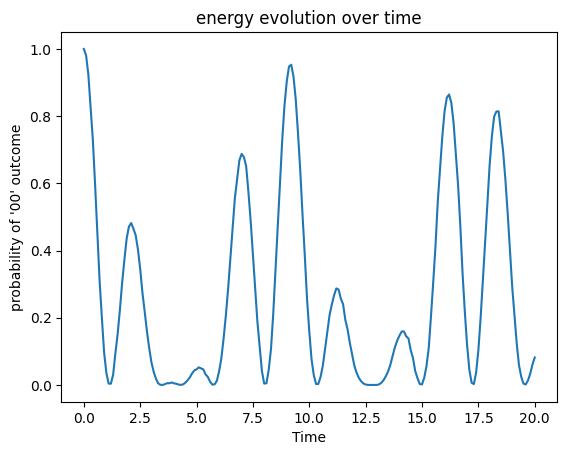

In [ ]:
plt.plot(state_evolution(state_string)[0], state_evolution(state_string)[1])

plt.xlabel("Time")
plt.ylabel("probability of '00' outcome")
plt.title("energy evolution over time")
plt.show()

This line plots of the normalized counts of the "00" outcome against the corresponding time steps and displays the graph. The plot shows a curve similar to sinusoidal oscillation for coupled oscillators. This indicates that the energy is being transferred back and forth between the oscillators, indicating there is a periodic motion. However, due to the complexity of the system the plot is not as idealistic as the "toy problem".  

In [ ]:
xpoints = []
ypoints_gates_1q = []
ypoints_gates_2q = []
ypoints_gates_total = []
ypoints_width = []
ypoints_depth = []
for key, counts in resources_used.items():
  xpoints.append(key)
  if "u" in counts['gate_counts'].keys():
    ypoints_gates_1q.append(counts['gate_counts']['u'])
  else:
    ypoints_gates_1q.append(0)
  if "cx" in counts['gate_counts'].keys():
    ypoints_gates_2q.append(counts['gate_counts']['cx'])
  else:
    ypoints_gates_2q.append(0)

  ypoints_gates_total.append(sum(counts['gate_counts'].values()))

  ypoints_width.append(counts['circuit_width'])

  ypoints_depth.append(counts['circuit_depth'])

This code block processes and organizes resource usage data across different time steps, including:
- Single-qubit (`u`) and two-qubit (`cx`) gate counts
- Total gate count
- Circuit width
- Circuit depth

These metrics are stored in separate lists for further analysis or visualization.

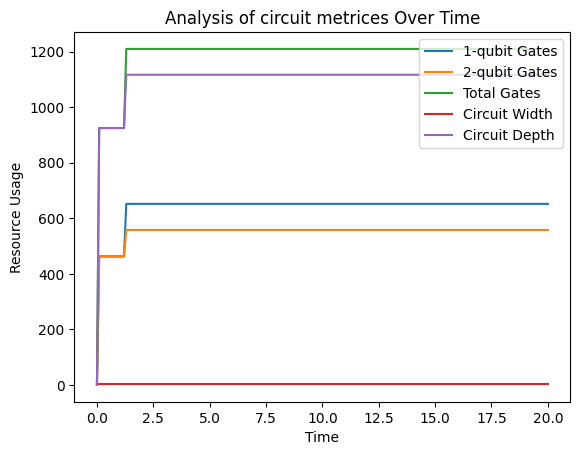

In [ ]:
plt.plot(xpoints, ypoints_gates_1q, label='1-qubit Gates')
plt.plot(xpoints, ypoints_gates_2q, label='2-qubit Gates')
plt.plot(xpoints, ypoints_gates_total, label='Total Gates')
plt.plot(xpoints, ypoints_width, label='Circuit Width')
plt.plot(xpoints, ypoints_depth, label='Circuit Depth')
plt.title("Analysis of circuit metrices Over Time")
plt.xlabel("Time")
plt.ylabel("Resource Usage")
plt.legend(loc="upper right")

plt.show()

This line plots the number of single-qubit gates, two-qubit gates, total gate count, circuit width, and circuit depth against time steps, displaying all metrics on the same graph.


# **VQE for Optimal Energy:**

In [ ]:
from typing import List
HAMILTONIAN = QConstant("HAMILTONIAN", List[PauliTerm], pauli_list_to_hamiltonian(pauli_list))

In [ ]:
@qfunc
def main(q: Output[QArray[QBit]], angles: CArray[CReal, 6]) -> None:
    allocate(len(pauli_list[0][0]), q)
    repeat(q.len, lambda i: U(angles[0], angles[1], angles[2], 0, q[i]))
    repeat(q.len-1, lambda i: repeat(q.len-i-1, lambda j: CX(q[i], q[i+j+1])))
    repeat(q.len, lambda i: U(angles[3], angles[4], angles[5], 0, q[i]))

@cfunc
def cmain() -> None:
    # Run VQE
    res = vqe(
        HAMILTONIAN,
        False,
        [],
        optimizer=Optimizer.COBYLA,
        max_iteration=5000,
        tolerance=0.001,
        step_size=0,
        skip_compute_variance=False,
        alpha_cvar=1.0,
    )
    save({"result": res})

qmod = create_model(main, classical_execution_function=cmain)
qprog = synthesize(qmod)
show(qprog)


Opening: https://platform.classiq.io/circuit/09db2dc0-5d3b-480e-ab9e-18583dcbe633?version=0.44.0


We are going to create a VQE algorithm to estimate the minimum energy (eigenvalue) of the calculated Hamiltonian. Execution of this program on classiq platform will show the graph of energy convergence as a function of iterations.
### **Code Inspiration**

For additional insights and examples you can refer to the following reference:

- [Variational Quantum Eigensolver (VQE) with Classiq](https://docs.classiq.io/latest/explore/community/basic_examples/vqe/vqe/)

In [ ]:
execution = execute(qprog)
vqe_result = execution.result()[0].value


In [ ]:
print(f"Optimal energy: {vqe_result.energy}")
print(f"Optimal parameters: {vqe_result.optimal_parameters}")
print(f"Eigenstate: {vqe_result.eigenstate}")

Optimal energy: -1.7305311286763678
Optimal parameters: {'angles_param_0': 1.7856461594131117, 'angles_param_1': -6.2233940792956615, 'angles_param_2': 5.364623166800914, 'angles_param_3': -3.379744157721914, 'angles_param_4': 1.839355328958225, 'angles_param_5': 1.8537962474487846}
Eigenstate: {'00': (0.5417167444799911+0j), '10': (0.5990715472712754+0j), '01': (0.4759858191164943+0j), '11': (0.34798527267687634+0j)}


As an example we have added here the circuit diagram and the plot for the fixed set of values.

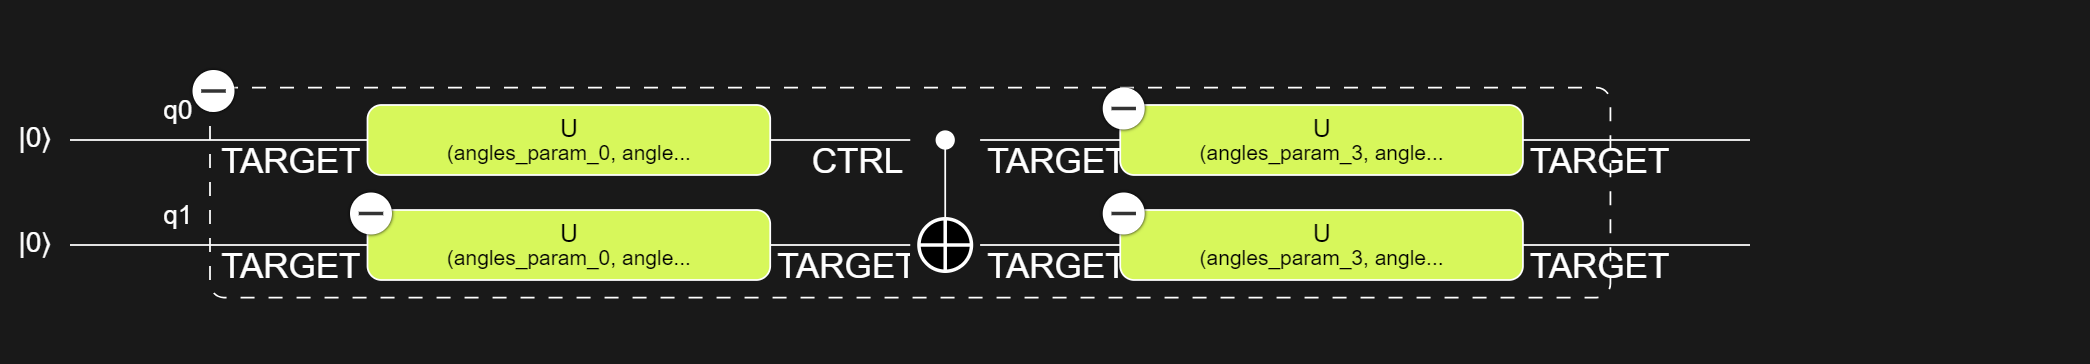


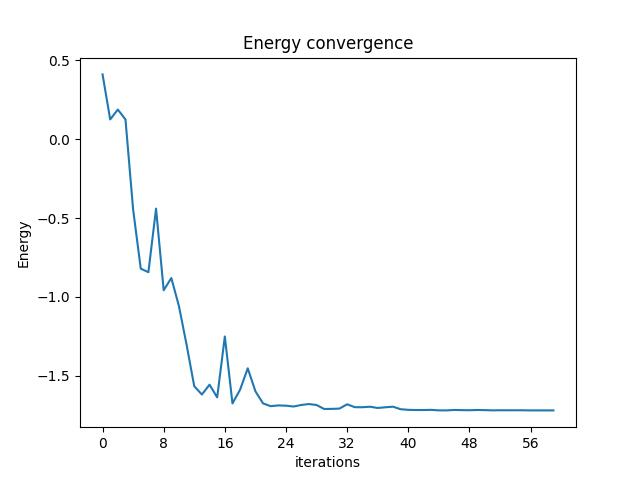

*Image credit: classiq platform*